In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
import cv2
import pandas as pd
import random
import ntpath
import os
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

np.random.seed(0)

Using TensorFlow backend.


In [3]:
columns = ['center','left','right','steering','throttle','reverse','speed']
dataset = pd.read_csv('driving_log.csv',names=columns)

In [4]:
pd.set_option('display.max_colwidth',-1)
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\shubh\Downloads\simulator-windows-64\IMG\center_2020_05_19_11_35_59_703.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\left_2020_05_19_11_35_59_703.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\right_2020_05_19_11_35_59_703.jpg,0.0,0.0,0.0,0.000083
1,C:\Users\shubh\Downloads\simulator-windows-64\IMG\center_2020_05_19_11_35_59_805.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\left_2020_05_19_11_35_59_805.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\right_2020_05_19_11_35_59_805.jpg,0.0,0.0,0.0,0.000079
2,C:\Users\shubh\Downloads\simulator-windows-64\IMG\center_2020_05_19_11_35_59_905.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\left_2020_05_19_11_35_59_905.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\right_2020_05_19_11_35_59_905.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\shubh\Downloads\simulator-windows-64\IMG\center_2020_05_19_11_36_00_008.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\left_2020_05_19_11_36_00_008.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\right_2020_05_19_11_36_00_008.jpg,0.0,0.0,0.0,0.000079
4,C:\Users\shubh\Downloads\simulator-windows-64\IMG\center_2020_05_19_11_36_00_109.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\left_2020_05_19_11_36_00_109.jpg,C:\Users\shubh\Downloads\simulator-windows-64\IMG\right_2020_05_19_11_36_00_109.jpg,0.0,0.0,0.0,0.000080


In [5]:
def path_leaf(path):
    head,tail = ntpath.split(path)
    return tail
dataset['center'] = dataset['center'].apply(path_leaf)
dataset['right'] = dataset['right'].apply(path_leaf)
dataset['left'] = dataset['left'].apply(path_leaf)

In [6]:
dataset.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_05_19_11_35_59_703.jpg,left_2020_05_19_11_35_59_703.jpg,right_2020_05_19_11_35_59_703.jpg,0.0,0.0,0.0,0.000083
1,center_2020_05_19_11_35_59_805.jpg,left_2020_05_19_11_35_59_805.jpg,right_2020_05_19_11_35_59_805.jpg,0.0,0.0,0.0,0.000079
2,center_2020_05_19_11_35_59_905.jpg,left_2020_05_19_11_35_59_905.jpg,right_2020_05_19_11_35_59_905.jpg,0.0,0.0,0.0,0.000078
3,center_2020_05_19_11_36_00_008.jpg,left_2020_05_19_11_36_00_008.jpg,right_2020_05_19_11_36_00_008.jpg,0.0,0.0,0.0,0.000079
4,center_2020_05_19_11_36_00_109.jpg,left_2020_05_19_11_36_00_109.jpg,right_2020_05_19_11_36_00_109.jpg,0.0,0.0,0.0,0.000080


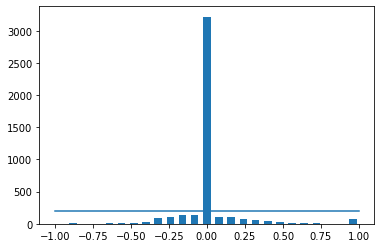

In [7]:
num_bins = 25
samples_per_bin = 200
hist,bins = np.histogram(dataset['steering'],num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dataset['steering']),np.max(dataset['steering'])),(samples_per_bin,samples_per_bin))

In [8]:
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(dataset['steering'])):
        if dataset['steering'][i] >= bins[j] and dataset['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)
dataset.drop(dataset.index[remove_list],inplace=True)

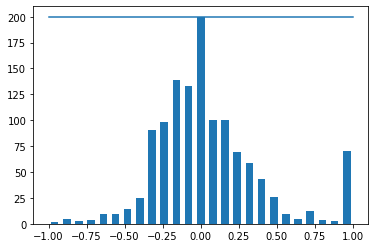

In [9]:
hist,_ = np.histogram(dataset['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dataset['steering']),np.max(dataset['steering'])),(samples_per_bin,samples_per_bin))

In [10]:
def load_image_steering(datadir,data):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
        image_path.append(os.path.join(datadir,center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths,steerings
image_paths,steerings = load_image_steering('G:/my_projects/deep learning/Self_Driving_Car'+'/IMG',dataset)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(image_paths,steerings,test_size=0.2)

Text(0.5, 1.0, 'Validation')

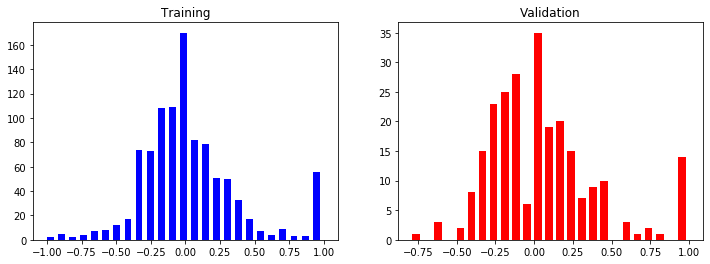

In [12]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title('Training')
axes[1].hist(y_test,bins=num_bins,width=0.05,color='red')
axes[1].set_title('Validation')

In [13]:
def zoom(image):
    zoom = iaa.Affine(scale=(1,1.3))
    image = zoom.augment_image(image)
    return image

In [14]:
def pan(image):
    pan = iaa.Affine(translate_percent={'x':(-0.1,0.1),'y':(-0.1,0.1)})
    image = pan.augment_image(image)
    return image

In [19]:
def image_rand_brightness(image):
    bright = iaa.Multiply((0.2,1.2))
    image = bright.augment_image(image)
    return image

In [16]:
def flipping(image,steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image,steering_angle

In [17]:
def random_augment(image,steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = image_rand_brightness(image)
    if np.random.rand() < 0.5:
        image,steering_angle = flipping(image,steering_angle)
    return image,steering_angle

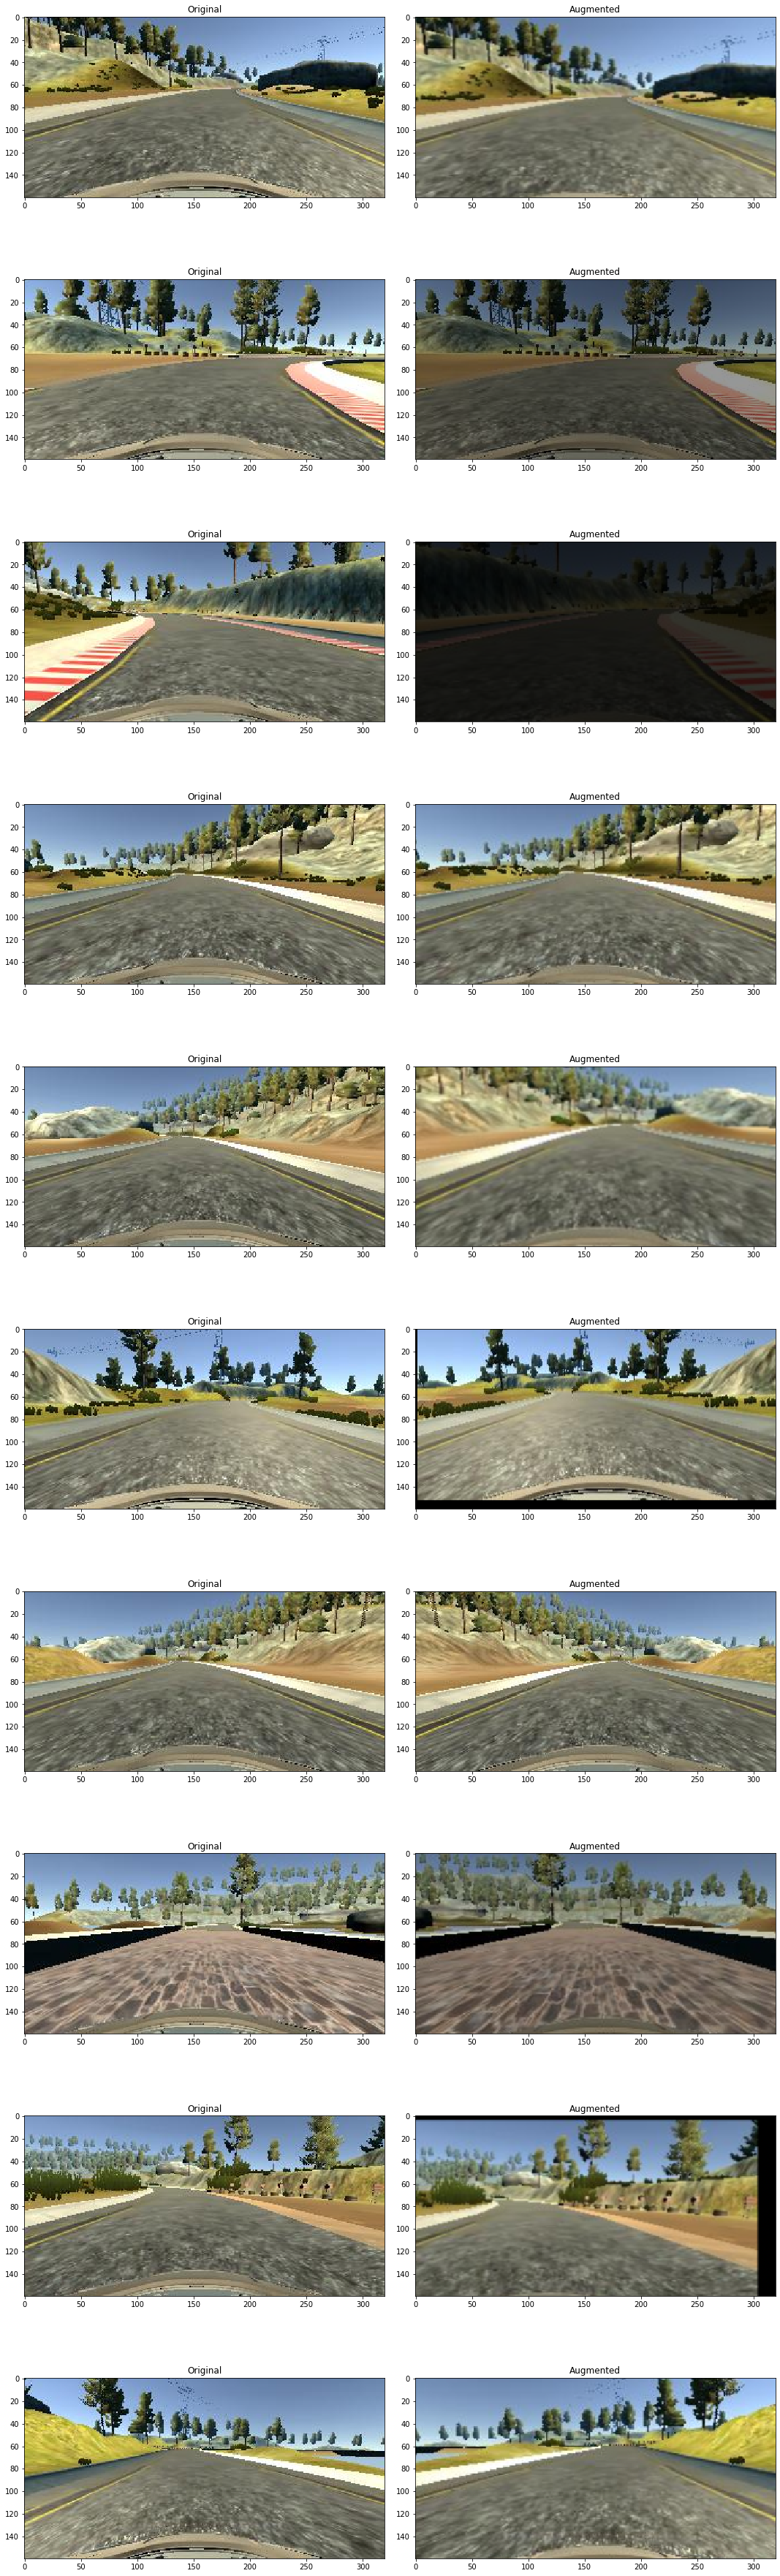

In [20]:
ncol = 2
nrow = 10
fig,axes = plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()
for i in range(10):
    rand_num = random.randint(0,len(image_paths)-1)
    rand_img = image_paths[rand_num]
    rand_steering = steerings[rand_num]
    original_img = mpimg.imread(rand_img)
    augmented_img,steering = random_augment(rand_img,rand_steering)
    axes[i][0].imshow(original_img)
    axes[i][0].set_title('Original')
    axes[i][1].imshow(augmented_img)
    axes[i][1].set_title('Augmented')
    

In [21]:
def image_preprocessing(image):
    image = image[60:135,:,:] # Cropping unneccesery parts of image
    image = cv2.cvtColor(image,cv2.COLOR_RGB2YUV) # required by nvidia model
    image = cv2.GaussianBlur(image,(3,3),0)
    image = cv2.resize(image,(200,66))  # nvidia requirement
    image = image/255.0                # normalising                  
    return image

In [22]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
        random_index = random.randint(0, len(image_paths) - 1)
      
        if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
        else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
      
        im = image_preprocessing(im)
        batch_img.append(im)
        batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

In [28]:
X_train_gen,y_train_gen = next(batch_generator(X_train,y_train,1,1))
X_test_gen,y_test_gen = next(batch_generator(X_test,y_test,1,1))

Text(0.5, 1, 'Validation Image')

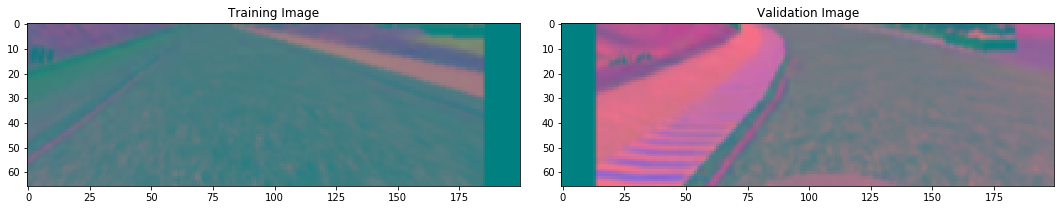

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(X_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(X_test_gen[0])
axs[1].set_title('Validation Image')

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = image_preprocessing(image)
fig,axes = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprossed')

In [34]:
#X_train = np.array(list(map(image_preprocessing,X_train)))
#X_test = np.array(list(map(image_preprocessing,X_test)))

(985, 66, 200, 3)


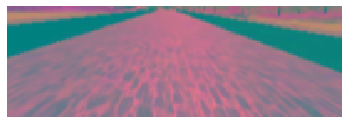

In [35]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [37]:
def nvidia_model():
    model = Sequential()

    model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))

    model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
    model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))


    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation ='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))


    optimizer= Adam(lr=1e-4)
    model.compile(loss='mse', optimizer=optimizer)

    return model

In [38]:
model = nvidia_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [42]:
history = model.fit_generator(batch_generator(X_train,y_train,100,1),steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_test,y_test,100,0),
                              validation_steps=200,
                              verbose=1,shuffle=1)

Epoch 1/10
300/300 [==============================] - 108s 359ms/step - loss: 0.0652 - val_loss: 0.0302
Epoch 2/10
300/300 [==============================] - 115s 382ms/step - loss: 0.0629 - val_loss: 0.0417
Epoch 3/10
300/300 [==============================] - 131s 437ms/step - loss: 0.0604 - val_loss: 0.0378
Epoch 4/10
300/300 [==============================] - 134s 445ms/step - loss: 0.0598 - val_loss: 0.0396
Epoch 5/10
300/300 [==============================] - 143s 478ms/step - loss: 0.0589 - val_loss: 0.0334
Epoch 6/10
300/300 [==============================] - 143s 477ms/step - loss: 0.0586 - val_loss: 0.0319
Epoch 7/10
300/300 [==============================] - 128s 428ms/step - loss: 0.0573 - val_loss: 0.0194
Epoch 8/10
300/300 [==============================] - 131s 437ms/step - loss: 0.0554 - val_loss: 0.0367
Epoch 9/10
300/300 [==============================] - 127s 424ms/step - loss: 0.0551 - val_loss: 0.0286
Epoch 10/10
300/300 [==============================] - 168s 560m

Text(0.5, 0, 'Epoch')

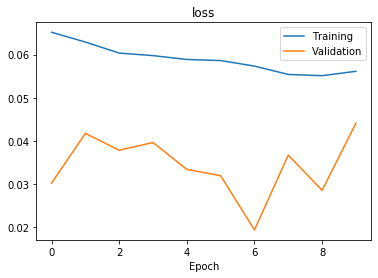

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('loss')
plt.xlabel('Epoch')

In [44]:
model.save('model.h5')